In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

### Data
The datases used is the Breast Cancer Wisconsin (Diagnostic) Data Set. This dataset consist of 569 samples with 30 features that are related to diagnosig breast cancer. While this is a labelled dataset we drop any label data in order to use it to explore PCA and Kmeans and see if we can discover clusters ourselves.


In [175]:
df = pd.read_csv('data/data.csv')
# Remove labels
df = df.loc[:, ~df.columns.isin(['id', 'Unnamed: 32', 'diagnosis'])]
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [176]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Data Processing

- Scale Features using Standard Scalar - This is important so that actual magnitude of a feature in terms of its variance etc does not come into effect when we do PCA later

In [178]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = df.copy()
df_scaled.loc[:, :] = scaler.transform(df.loc[:, :])
df_scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


### Principal Component Analysis
All our features are now numerical and we can go directly to doing PCA

Number of components for 90% variation  7
Explained variance ratios  [4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


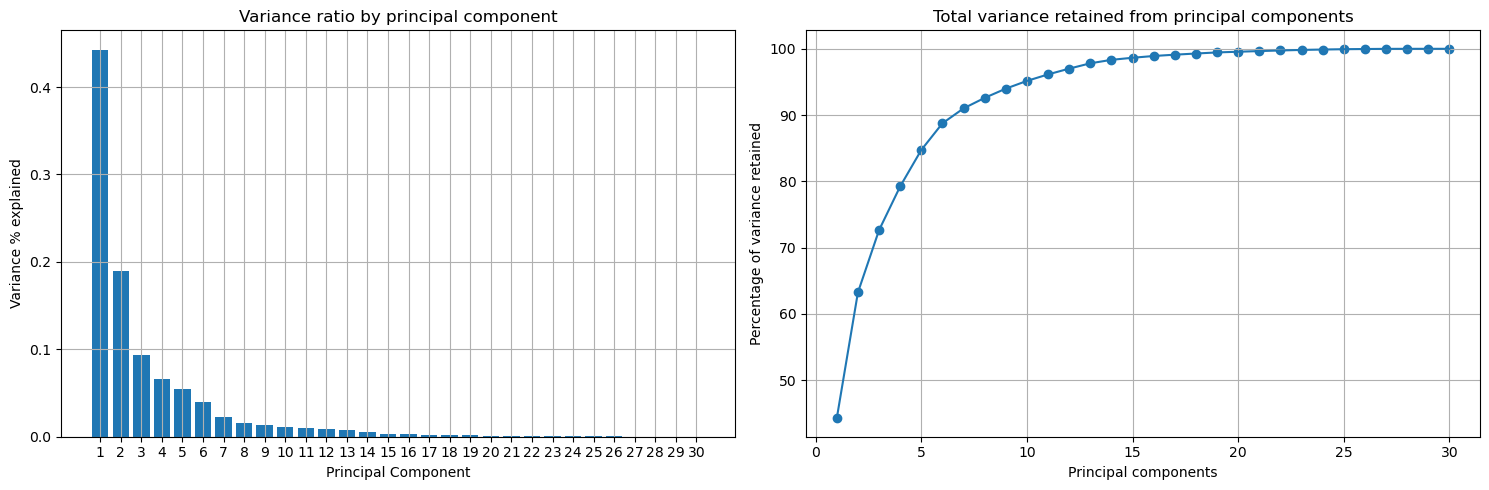

In [197]:
pca = PCA(n_components = df_scaled.shape[1])
pca.fit(df_scaled)
variances = pca.explained_variance_ratio_
components = 1+np.arange(len(variances))


fig,axis = plt.subplots(1,2,figsize=(15,5))

axis[0].set(xlabel = "Principal Component",ylabel="Variance % explained",
            title = "Variance ratio by principal component")
axis[0].bar(components.astype(str),variances )
axis[0].grid()


cumulative_variances = np.cumsum(variances)

axis[1].set(xlabel = "Principal components",ylabel = "Percentage of variance retained",
            title = "Total variance retained from principal components")
axis[1].scatter(components,cumulative_variances * 100)
axis[1].plot(components,cumulative_variances * 100)
axis[1].grid()
min_components_for_90_variance = np.where(cumulative_variances >= 0.90)[0][0] + 1
print("Number of components for 90% variation ", min_components_for_90_variance)
print("Explained variance ratios ", pca.explained_variance_ratio_)
fig.tight_layout()

In [199]:
i = 0
for p in pca.explained_variance_ratio_:
    print(f'Principal Component {i+1} : {p}')
    i = i+1

Principal Component 1 : 0.4427202560752631
Principal Component 2 : 0.18971182044033086
Principal Component 3 : 0.09393163257431388
Principal Component 4 : 0.06602134915470165
Principal Component 5 : 0.05495768492346276
Principal Component 6 : 0.040245220398833506
Principal Component 7 : 0.02250733712982502
Principal Component 8 : 0.015887238000213286
Principal Component 9 : 0.013896493745591114
Principal Component 10 : 0.011689781894131512
Principal Component 11 : 0.009797189875980182
Principal Component 12 : 0.008705379007378843
Principal Component 13 : 0.008045249871967319
Principal Component 14 : 0.0052336574549263605
Principal Component 15 : 0.003137832167627404
Principal Component 16 : 0.0026620933651523193
Principal Component 17 : 0.0019799679253242716
Principal Component 18 : 0.0017539594502263614
Principal Component 19 : 0.001649253059225165
Principal Component 20 : 0.0010386467483387044
Principal Component 21 : 0.0009990964637002536
Principal Component 22 : 0.00091464675105434

In [188]:
pca_ = PCA(n_components = min_components_for_90_variance)
df_pca_space = pca_.fit_transform(df_scaled)

### Kmeans Clustering

In [191]:
def k_means(model_supplier, data):
    inertia = []
    for n in range(1 , 11):
        model = model_supplier(n)
        model.fit(data)
        inertia.append(model.inertia_)
    return inertia

In [192]:
model = lambda n: (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=100, 
                        tol=0.001,  random_state= 2, algorithm='elkan')) 
raw_data_inertia = k_means(model, df_encoded)
pca_data_inertia = k_means(model, df_pca_space)

/home/phantom/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
/home/phantom/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


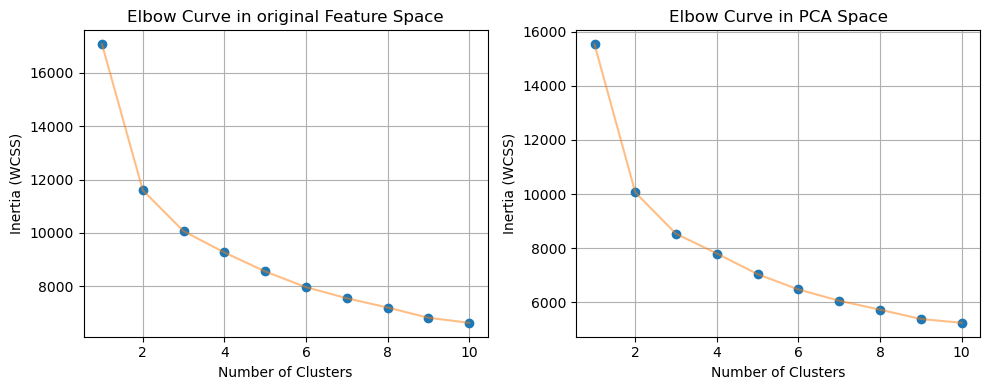

In [193]:
fig, ax = plt.subplots( 1, 2 , figsize = (10 ,4))
ax[0].plot(np.arange(1 , 11) , raw_data_inertia , 'o')
ax[0].plot(np.arange(1 , 11) , raw_data_inertia , '-' , alpha = 0.5)
ax[0].set_title('Elbow Curve in original Feature Space')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Inertia (WCSS)')
ax[1].plot(np.arange(1 , 11) , pca_data_inertia , 'o')
ax[1].plot(np.arange(1 , 11) , pca_data_inertia , '-' , alpha = 0.5)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Inertia (WCSS)')
ax[1].set_title('Elbow Curve in PCA Space')
fig.tight_layout()
ax[0].grid()
ax[1].grid()
plt.show()

In [194]:
k = 2
optimal_model = model(k)
optimal_model.fit(df_pca_space)

KMeans(algorithm='elkan', max_iter=100, n_clusters=2, n_init=10, random_state=2,
       tol=0.001)

In [195]:
df_with_pca_comp = pd.concat([df, pd.DataFrame(df_pca_space)], axis = 1)
df_with_pca_comp.rename(
    columns = {i : f'Principal Component {i+1}' for i in range(0,min_components_for_90_variance)}, inplace = True)
df_with_pca_comp['Label'] = optimal_model.labels_
df_with_pca_comp

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,symmetry_worst,fractal_dimension_worst,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,0.4601,0.11890,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411425,2.159364,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,0.2750,0.08902,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028655,0.013365,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,0.3613,0.08758,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541454,-0.668176,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,0.6638,0.17300,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053424,1.429895,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,0.2364,0.07678,3.935302,-1.948072,1.389767,2.940639,0.546748,-1.226495,-0.936214,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,0.2060,0.07115,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375190,-0.596147,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,0.2572,0.06637,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246708,-0.716340,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,0.2218,0.07820,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192757,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,0.4087,0.12400,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223079,0


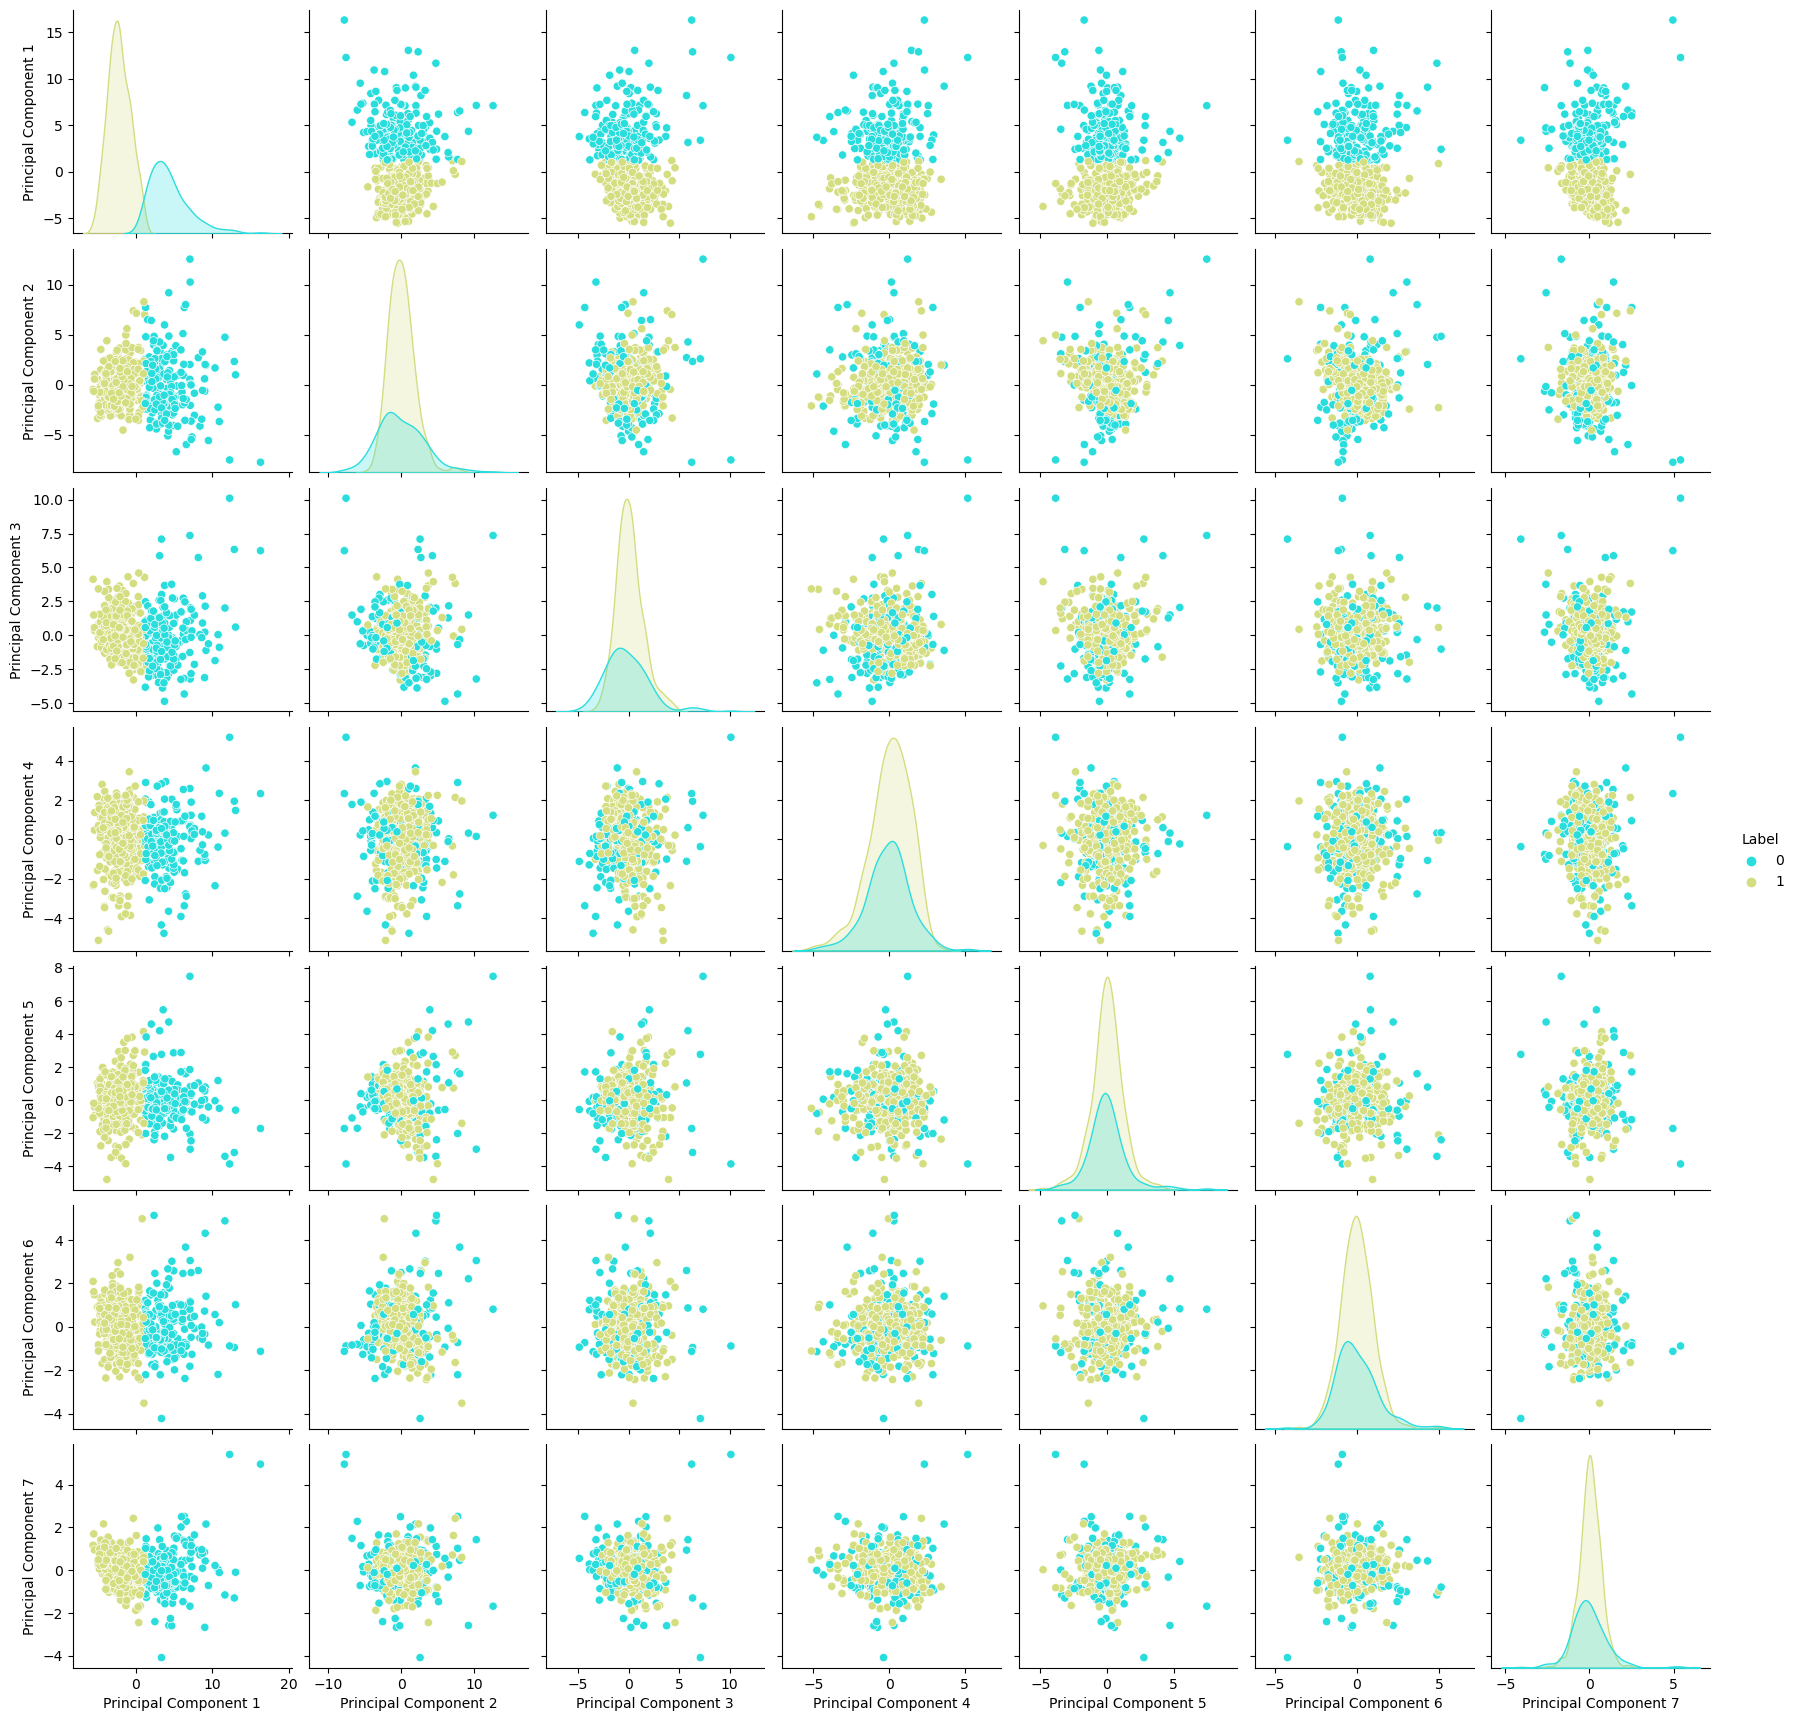

In [196]:
components = [f'Principal Component {i+1}' for i in range(min_components_for_90_variance)] + ['Label']
sns.pairplot(df_with_pca_comp.loc[:, df_with_pca_comp.columns.isin(components)],
             hue = 'Label',diag_kind = 'kde',
             kind = 'scatter',
             palette = 'rainbow')

From the above plots there are 2 clusters in the dataset . The separtion into these 2 clusters can be cleary seen in the plot of principal component 1 vs other principal components . Shows that ,ost variation captured by this component.  

### Notes for report


#### Dataset 
The datases used is the Breast Cancer Wisconsin (Diagnostic) Data Set. This dataset consist of 569 samples with 30 features that are related to diagnosig breast cancer. While this is a labelled dataset we drop any label data in order to use it to explore PCA and Kmeans and see if we can discover clusters ourselves.


 

#### Processing
Standard scaler on features. This is necessary since principal component analysis will yield new projection of the data that will be derived from standar deviation/variance of initial data so we don't want the actual magnitude of the standard deviation of a variable to influence calculation of new axis. 

#### Principal Component Analysis
Performed PCA and components have the following explained variance ratios

- PC1 ~ 0.38
- PC2 ~ 0.28
- PC3 ~ 0.19
- PC4 ~ 0.138
- PC5  ~0 i.e too small ^-34

to keep 90% variation in the dataset we only need 4 principal components (first 4) so we can reduce dimensionality by 1 and still have lot of variation .

#### Kmeans Clustering
Perform kmeans clustering on the projected data or in PCA space with 7 components. To determine optimal k value we do a parameter sweep over values in the range [1,11], the elbow kink occurs at 2. So we use 2 as number of clusters in the dataset. 


#### Limitations
While does reduce dimnsionality we lose interpretability i.e we discarded 23 components but do not necessarily know which features they correspond to in feature space


  
